# Predicting the Sale Price of Houses using Machine Learning

## 1. Problem Definition
### Predict the prices of Paris houses based on their information, such as location, size, and more.

## 2. Dataset Description
### The data description can be found at https://www.kaggle.com/competitions/playground-series-s3e6/data

In [ ]:
# Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

For this project, I've downloaded the data from Kaggle and stored it in my PC

In [ ]:
#now we import the data
df_train_completed = pd.read_csv("train.csv")
df_test_completed = pd.read_csv("test.csv")

In [ ]:
#Removing unecessary data
df_train = df_train_completed.drop(columns=['id','cityCode'])
df_test = df_test_completed.drop(columns=['id','cityCode'])

In [ ]:
df_train.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,34291,24,1,0,47,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


The value to predict is the price

In [ ]:
df_test.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,47580,89,0,1,8,5,3,1995,0,0,6885,8181,241,0,8
1,62083,38,0,0,87,10,3,1994,1,1,4601,9237,393,1,4
2,90499,75,1,1,37,9,6,1997,0,1,7454,2680,305,0,2
3,16354,47,1,1,9,6,5,2019,1,1,705,5097,122,1,5
4,67510,8,0,0,55,3,7,2014,1,1,3715,7979,401,1,9


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       22730 non-null  int64  
 1   numberOfRooms      22730 non-null  int64  
 2   hasYard            22730 non-null  int64  
 3   hasPool            22730 non-null  int64  
 4   floors             22730 non-null  int64  
 5   cityPartRange      22730 non-null  int64  
 6   numPrevOwners      22730 non-null  int64  
 7   made               22730 non-null  int64  
 8   isNewBuilt         22730 non-null  int64  
 9   hasStormProtector  22730 non-null  int64  
 10  basement           22730 non-null  int64  
 11  attic              22730 non-null  int64  
 12  garage             22730 non-null  int64  
 13  hasStorageRoom     22730 non-null  int64  
 14  hasGuestRoom       22730 non-null  int64  
 15  price              22730 non-null  float64
dtypes: float64(1), int64(1

### Checking for missing values:

In [ ]:
df_test.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
dtype: int64

In [ ]:
df_train.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

Since It doesn't have any missing values, It's OK to continue



## Plots
> now let's create some plots that can help us to improve our knowledge about the data and improve It.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_train['price'].describe()

count    2.273000e+04
mean     4.634457e+06
std      2.925163e+06
min      1.031350e+04
25%      2.041739e+06
50%      4.450823e+06
75%      7.159920e+06
max      1.000428e+07
Name: price, dtype: float64

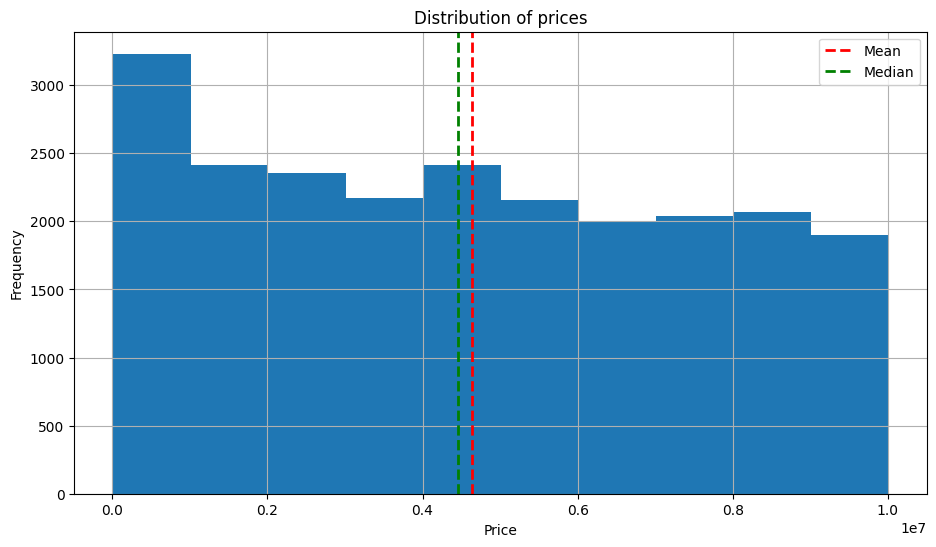

In [ ]:
plt.figure(figsize=(11, 6))
plt.hist(df_train['price'])
plt.axvline(x=df_train['price'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(x=df_train['price'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of prices')
plt.legend()
plt.grid(True)

plt.show()

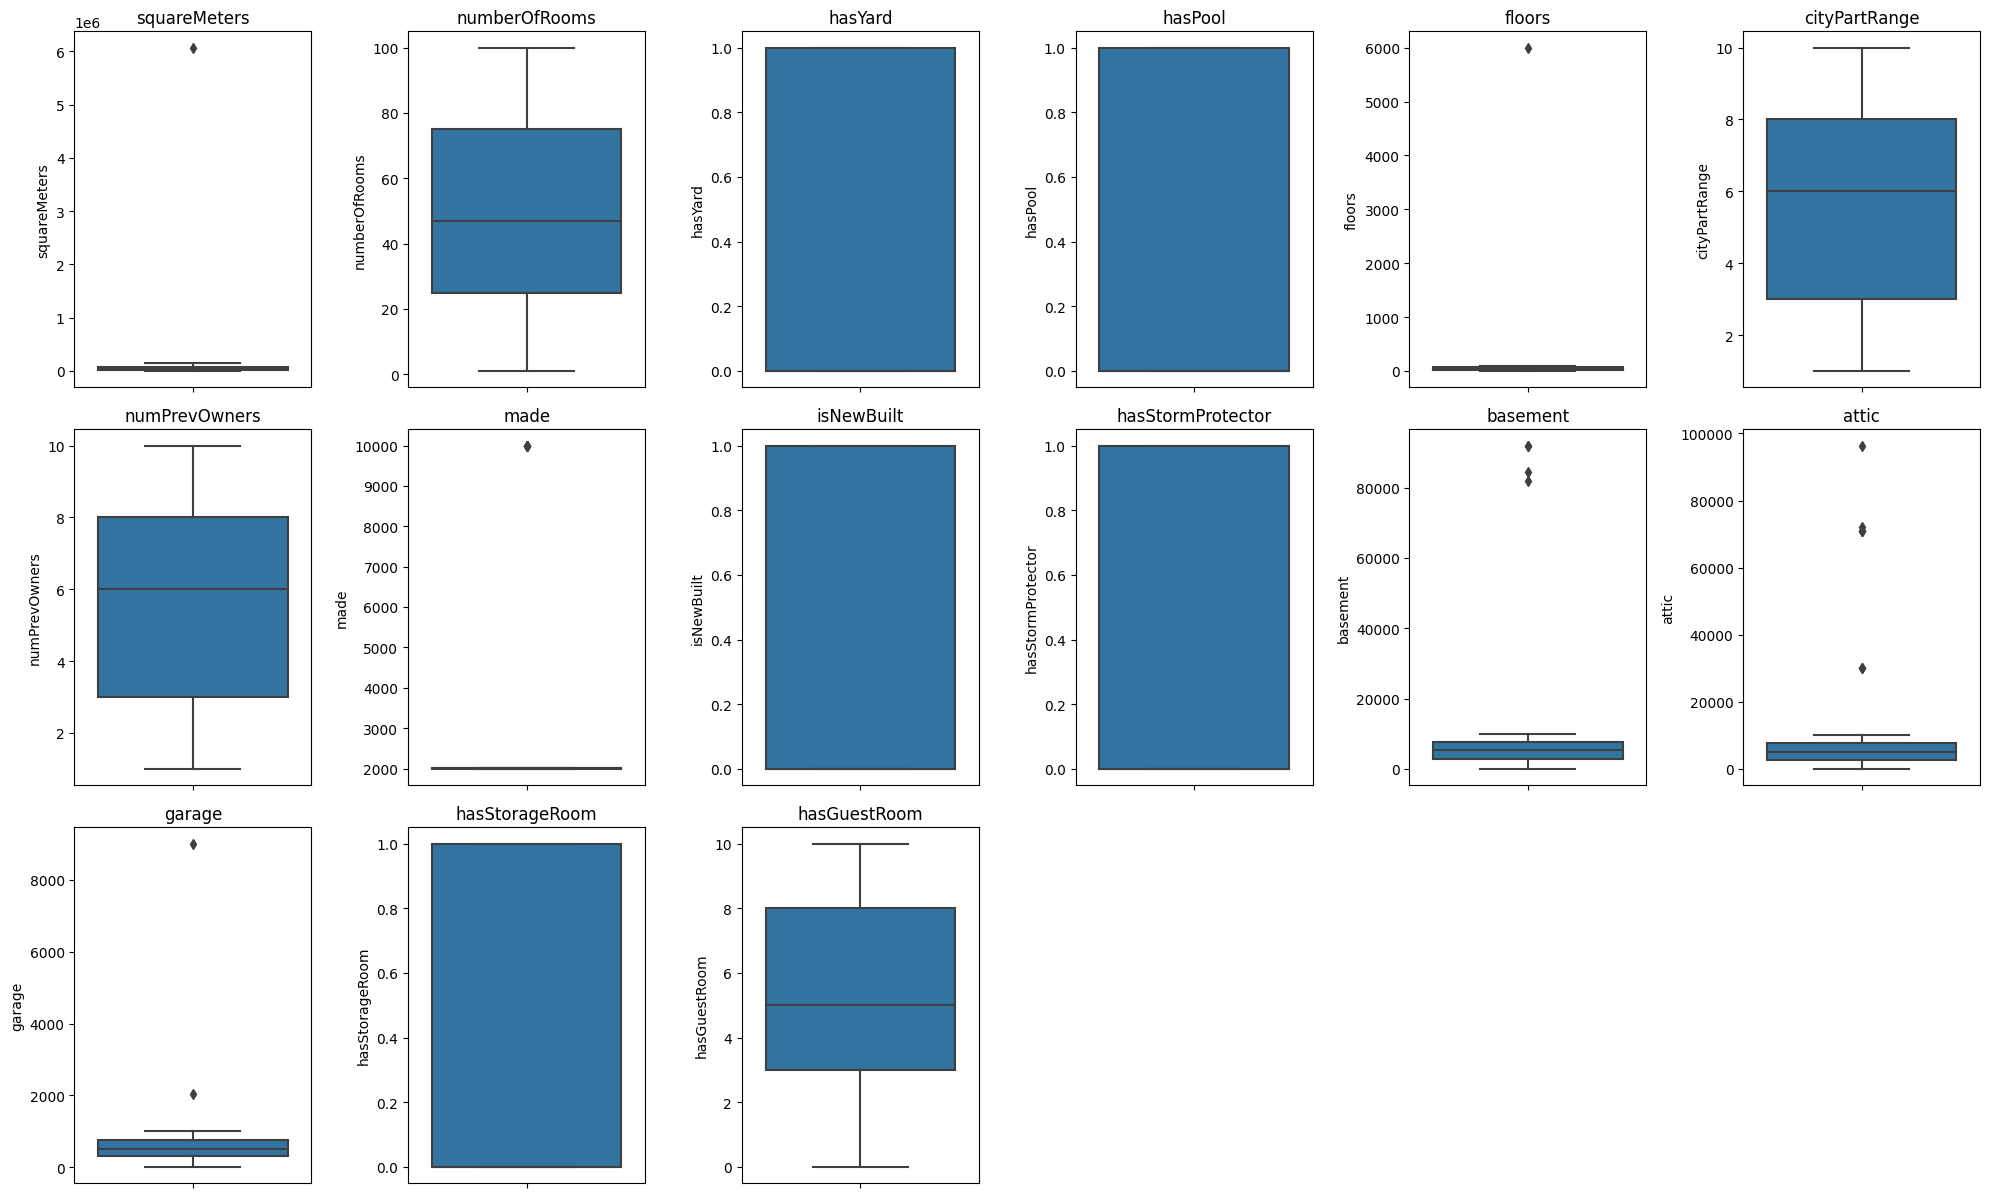

In [ ]:
num_cols = df_test.columns.to_list()
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(num_cols):
    ax=fig.add_subplot(5,6,i+1)
    sns.boxplot(y=df_train[feature],data=df_train)
    ax.set_title(feature,color='black')
fig.tight_layout()
plt.show()


As we can see, the data has a lot of outliers, so let's deal with them.

In [ ]:
df_train = df_train[df_train['squareMeters'] < 6000000]
df_train = df_train[df_train['floors'] < 2000]
df_train = df_train[df_train['garage'] < 2000]
df_train = df_train[df_train['made'] < 9000]
df_train = df_train[df_train['basement'] < 60000]
df_train = df_train[df_train['attic'] < 20000]

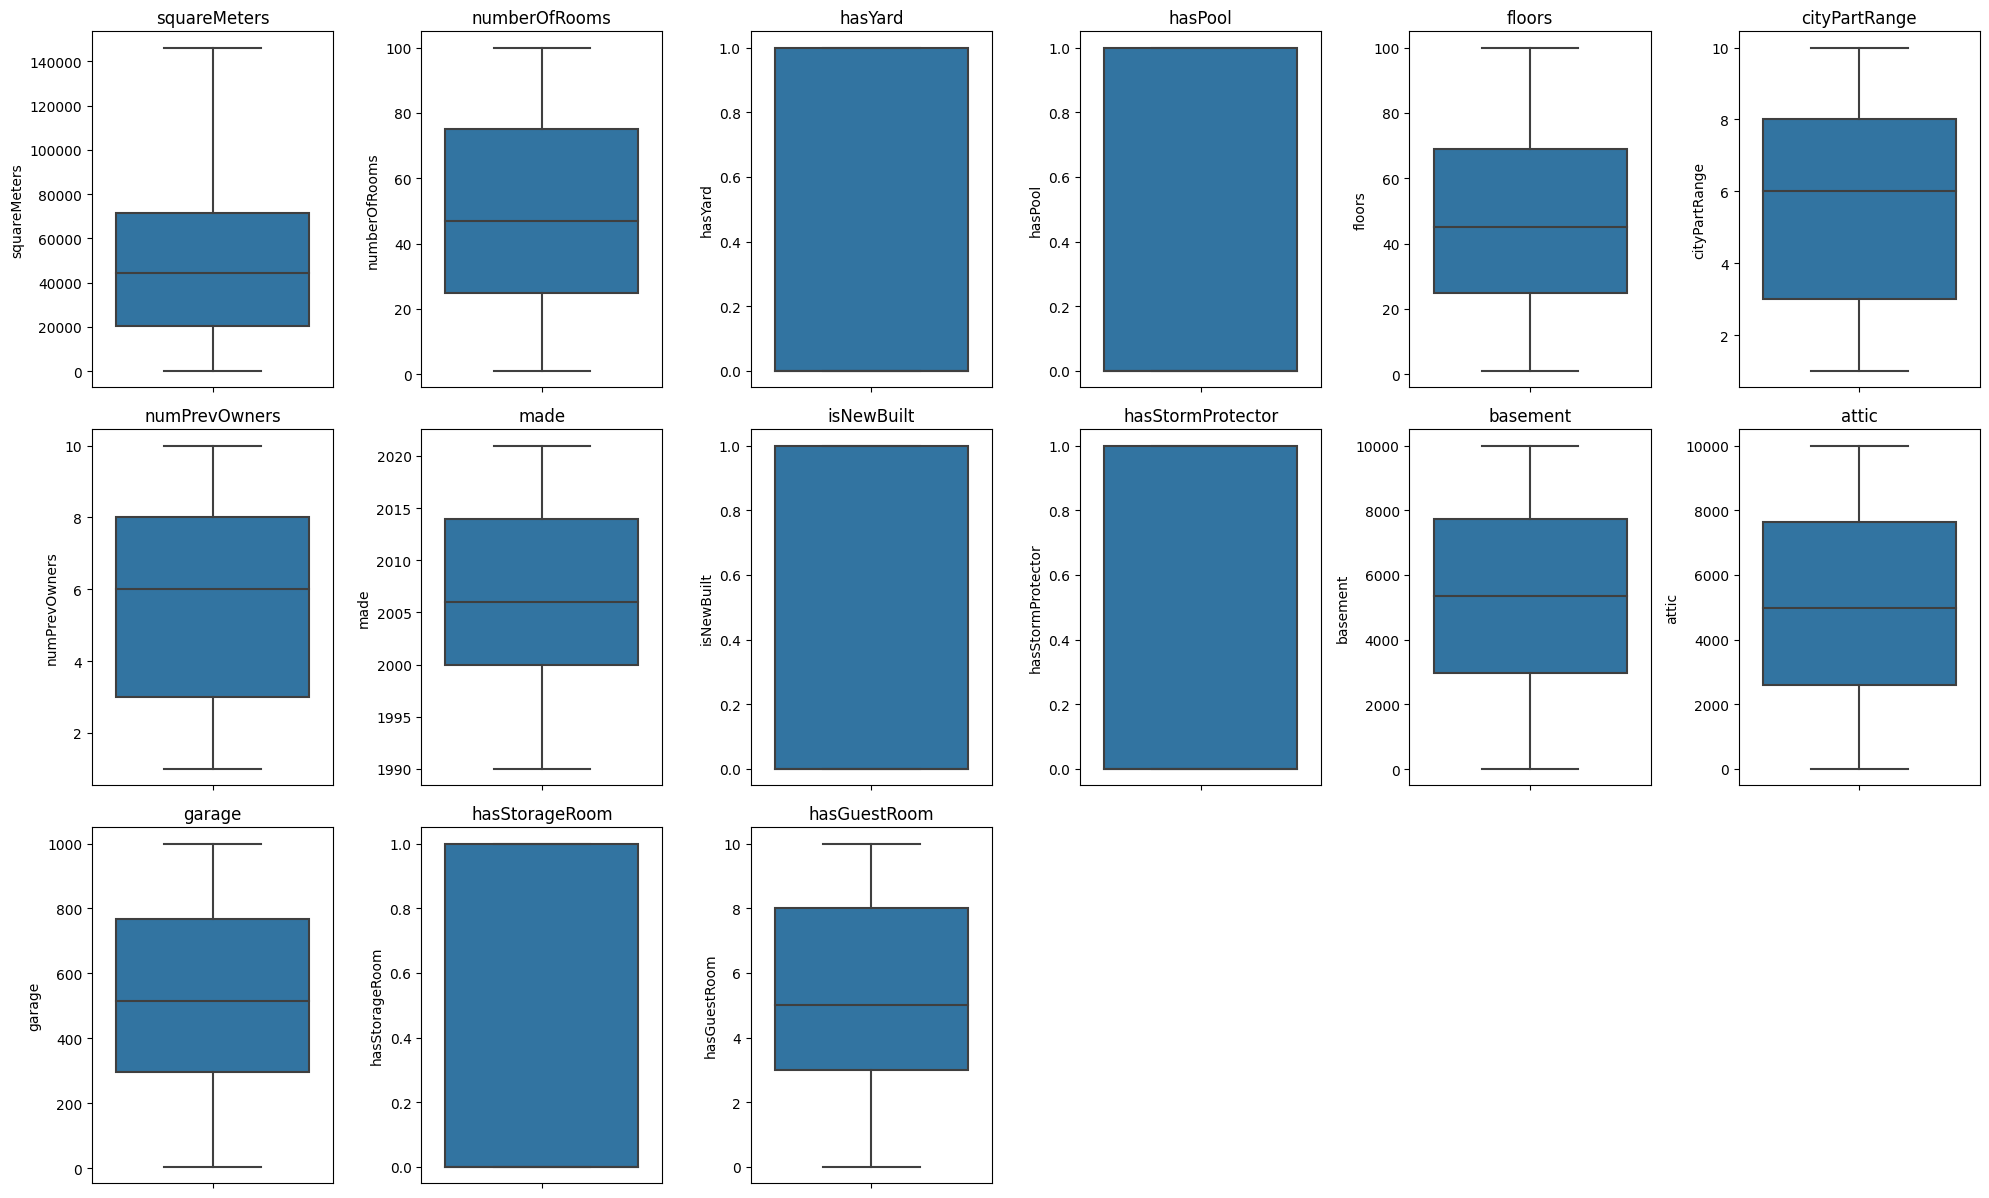

In [ ]:
num_cols = df_test.columns.to_list()
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(num_cols):
    ax=fig.add_subplot(5,6,i+1)
    sns.boxplot(y=df_train[feature],data=df_train)
    ax.set_title(feature,color='black')
fig.tight_layout()
plt.show()

Now the data is better and ready to be used for predictions ❗

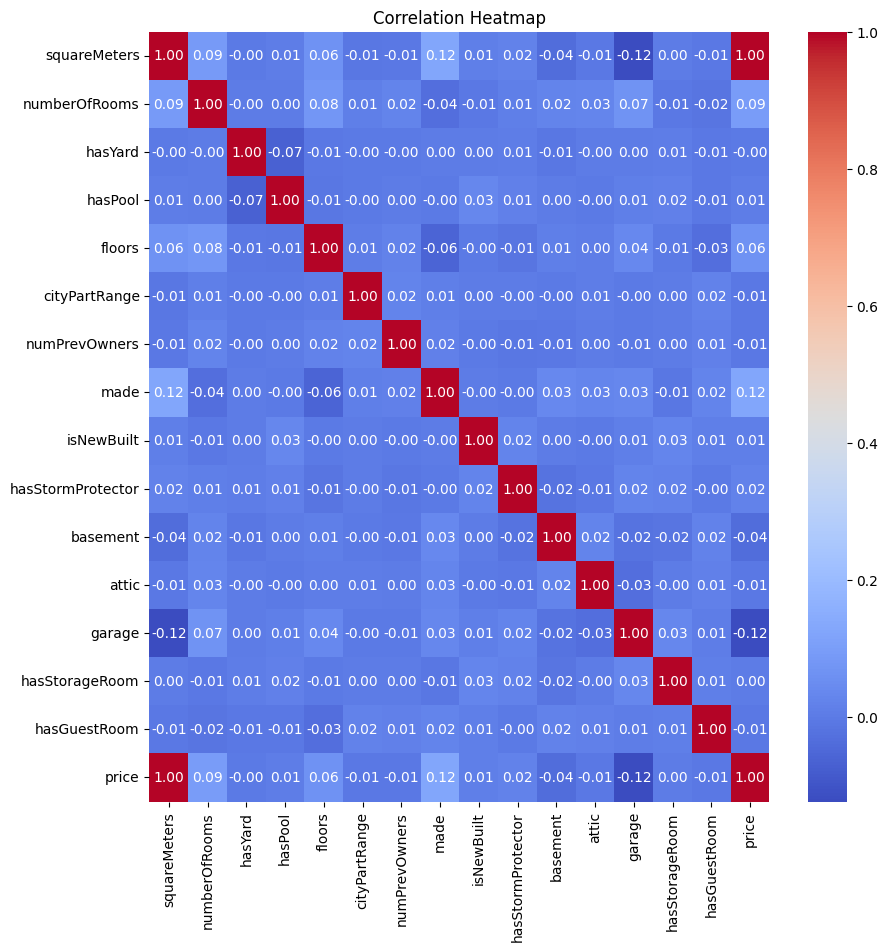

In [ ]:
#Let's see the correlation beetween the datas
correlation_matrix = df_train.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.drop(['price'], axis=1)

Y=df_train['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)



Following the Scikit-Learn machine learning map (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) , we find that RandomForestRegressor() might be a good candidate.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
model.score(x_test, y_test)

0.998108474025783

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Mean squared error (MSE): 16611481878.30
Coefficient of determination (R^2): 1.00


In [ ]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error


def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(x_test)
    scores = {"MAE": mean_absolute_error(y_test, y_pred),
              "RMSLE": rmsle( y_test, y_pred),
              "R^2": model.score(x_test, y_test)}
    return scores

In [ ]:
y_test.shape, y_pred.shape

((4542,), (4542,))

In [ ]:
show_scores(model)

{'Training MAE': 9533.128719286764,
 'Training RMSLE': 0.08969324165328531,
 'Training R^2': 0.998108474025783}

##As we can see, the results of the model fitted using the training data went quite well. Therefore, let's train it with all the available data and then submit the predictions to Kaggle!!

In [ ]:
print(X.shape, Y.shape, df_test.shape)

(22710, 15) (22710,) (15154, 15)


In [ ]:
model.fit(X,Y)
y_test_pred = model.predict(df_test)


In [ ]:
submission = pd.DataFrame({'Id': df_test_completed['id'], 'price': y_test_pred})
submission.to_csv('submission.csv', index=False)

## Note: this model got rank 200 in kaggle